In [33]:
!pip install ibm_db
!pip install catboost
import ibm_db


In [34]:
import pandas as pd
import ibm_db_dbi

In [35]:
#Replace the placeholder values with your actual Db2 hostname, username, and password:
dsn_hostname = "54a2f15b-5c0f-46df-8954-7e38e612c2bd.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud"
dsn_uid = "fkz43048" # e.g. "abc12345"
dsn_pwd = "z2wIzV1igdpgF4Ie" # e.g. "7dBZ3wWt9XN6$o0J"
dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "bludb" # e.g. "BLUDB"
dsn_port = "32733" # e.g. "32733"
dsn_protocol = "TCPIP" # i.e. "TCPIP"
dsn_security = "SSL" #i.e. "SSL"

In [36]:
#DO NOT MODIFY THIS CELL. Just RUN it with Shift + Enter
#Create the dsn connection string
dsn = (
 "DRIVER={0};"
 "DATABASE={1};"
 "HOSTNAME={2};"
 "PORT={3};"
 "PROTOCOL={4};"
 "UID={5};"
 "PWD={6};"
 "SECURITY={7};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd, dsn_security)

# Print the connection string to check if correct values are specified
print(dsn)

DRIVER={IBM DB2 ODBC DRIVER};DATABASE=bludb;HOSTNAME=54a2f15b-5c0f-46df-8954-7e38e612c2bd.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud;PORT=32733;PROTOCOL=TCPIP;UID=fkz43048;PWD=z2wIzV1igdpgF4Ie;SECURITY=SSL;


In [37]:
#DO NOT MODIFY THIS CELL. Just RUN it with Shift + Enter
#Create database connection
try:
 conn = ibm_db.connect(dsn, "", "")
 print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn)
except:
 print ("Unable to connect: ", ibm_db.conn_errormsg() )

Connected to database:  bludb as user:  fkz43048 on host:  DRIVER={IBM DB2 ODBC DRIVER};DATABASE=bludb;HOSTNAME=54a2f15b-5c0f-46df-8954-7e38e612c2bd.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud;PORT=32733;PROTOCOL=TCPIP;UID=fkz43048;PWD=z2wIzV1igdpgF4Ie;SECURITY=SSL;


In [38]:
#connection for pandas
pconn = ibm_db_dbi.Connection(conn)

In [39]:
#Retrieve Metadata for the Database Server
server = ibm_db.server_info(conn)
print ("DBMS_NAME: ", server.DBMS_NAME)
print ("DBMS_VER: ", server.DBMS_VER)
print ("DB_NAME: ", server.DB_NAME)

DBMS_NAME:  DB2/LINUXX8664
DBMS_VER:  11.05.0800
DB_NAME:  BLUDB


In [40]:
#Retrieve Metadata for the Database Client / Driver
client = ibm_db.client_info(conn)
print ("DRIVER_NAME: ", client.DRIVER_NAME)
print ("DRIVER_VER: ", client.DRIVER_VER)
print ("DATA_SOURCE_NAME: ", client.DATA_SOURCE_NAME)
print ("DRIVER_ODBC_VER: ", client.DRIVER_ODBC_VER)
print ("ODBC_VER: ", client.ODBC_VER)
print ("ODBC_SQL_CONFORMANCE: ", client.ODBC_SQL_CONFORMANCE)
print ("APPL_CODEPAGE: ", client.APPL_CODEPAGE)
print ("CONN_CODEPAGE: ", client.CONN_CODEPAGE)

DRIVER_NAME:  libdb2.a
DRIVER_VER:  11.05.0600
DATA_SOURCE_NAME:  BLUDB
DRIVER_ODBC_VER:  03.51
ODBC_VER:  03.01.0000
ODBC_SQL_CONFORMANCE:  EXTENDED
APPL_CODEPAGE:  1208
CONN_CODEPAGE:  1208


Task 1: Count number of rows of the table

In [42]:
query = '''SELECT COUNT(*) as number_of_rows FROM CARDIO'''
pdf = pd.read_sql(query, pconn)
pdf




,NUMBER_OF_ROWS
0,70000


Task 2: Count the number of cases which have Cardiovascular disease

In [48]:
query = '''SELECT COUNT(*) FROM CARDIO WHERE CARDIO = 1;
'''
pdf = pd.read_sql(query, pconn)
pdf



/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,1
0,34979


Task 3: How many women and men in the experiment

In [49]:
query = '''SELECT GENDER, COUNT(*) AS Count
FROM CARDIO
GROUP BY GENDER;;
'''
pdf = pd.read_sql(query, pconn)
pdf

/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,GENDER,COUNT
0,1,45530
1,2,24470


Task 4: Sort data descendingly using AP_HI column, limiting to 10 results. Count how many percent of the illness people in these 10 samples.

In [13]:
#1. Query statement
query = "SELECT AP_HI,CARDIO FROM CARDIO ORDER BY AP_HI DESC LIMIT 10"
#2. Execute statement
results = ibm_db.exec_immediate(conn, query)
#Fetch the rest of the rows
count = 0
while ibm_db.fetch_row(results) != False:
 ap_hi = float(ibm_db.result(results, 0))
 cardio = int(ibm_db.result(results, "CARDIO"))
 if cardio==1: count+=1
 print(" AP_HI:", ap_hi, "CARDIO:", cardio)
print("There are {}/10 cases got illness.".format(count))

 AP_HI: 16020.0 CARDIO: 1
 AP_HI: 14020.0 CARDIO: 1
 AP_HI: 14020.0 CARDIO: 0
 AP_HI: 14020.0 CARDIO: 1
 AP_HI: 14020.0 CARDIO: 1
 AP_HI: 13010.0 CARDIO: 1
 AP_HI: 13010.0 CARDIO: 0
 AP_HI: 11500.0 CARDIO: 1
 AP_HI: 11020.0 CARDIO: 1
 AP_HI: 2000.0 CARDIO: 1
There are 8/10 cases got illness.


Task 5: Retrieve data of patient who has weight more than average weight from the table, limiting the result to 10 rows. How many percent of chance do they got the vascular problem.

In [14]:
#1. Query statement
query = '''SELECT WEIGHT,CARDIO FROM CARDIO \
WHERE WEIGHT>(SELECT AVG(WEIGHT) \
FROM CARDIO) \
ORDER BY WEIGHT DESC LIMIT 10'''
#2. Execute statement
results = ibm_db.exec_immediate(conn, query)
#Fetch the rest of the rows
count = 0
while ibm_db.fetch_row(results) != False:
 weight = float(ibm_db.result(results, 0))
 cardio = int(ibm_db.result(results, "CARDIO"))
 if cardio==1: count+=1
 print(" WEIGHT:", weight, "CARDIO:", cardio)
print("There are {}/10 cases got illness.".format(count))

 WEIGHT: 200.0 CARDIO: 0
 WEIGHT: 200.0 CARDIO: 1
 WEIGHT: 183.0 CARDIO: 1
 WEIGHT: 181.0 CARDIO: 1
 WEIGHT: 180.0 CARDIO: 1
 WEIGHT: 180.0 CARDIO: 1
 WEIGHT: 180.0 CARDIO: 1
 WEIGHT: 180.0 CARDIO: 1
 WEIGHT: 178.0 CARDIO: 0
 WEIGHT: 178.0 CARDIO: 1
There are 8/10 cases got illness.


Task 6: Obtain the ones who consume glucose far more than normal( GLUC > 1), limiting the results to 10. How many people got the illness in the result.

In [15]:
#1. Query statement
query = "SELECT GLUC,CARDIO FROM CARDIO WHERE GLUC > 1 LIMIT 10"
#2. Execute statement
results = ibm_db.exec_immediate(conn, query)
#Fetch the rest of the rows
count = 0
while ibm_db.fetch_row(results) != False:
 gluc = float(ibm_db.result(results, 0))
 cardio = int(ibm_db.result(results, "CARDIO"))
 if cardio==1: count+=1
 print(" GLUC:", gluc, "CARDIO:", cardio)
print("There are {}/10 cases got illness.".format(count))

 GLUC: 2.0 CARDIO: 0
 GLUC: 3.0 CARDIO: 1
 GLUC: 3.0 CARDIO: 0
 GLUC: 2.0 CARDIO: 1
 GLUC: 3.0 CARDIO: 0
 GLUC: 3.0 CARDIO: 1
 GLUC: 2.0 CARDIO: 0
 GLUC: 2.0 CARDIO: 1
 GLUC: 2.0 CARDIO: 0
 GLUC: 2.0 CARDIO: 1
There are 5/10 cases got illness.


Task 7: Query to get 10 oldest people in the table. How many of them got vascular problem.

In [16]:
#1. Query statement
query = "SELECT AGE,CARDIO FROM CARDIO ORDER BY AGE DESC LIMIT 10"
#2. Execute statement
results = ibm_db.exec_immediate(conn, query)
#Fetch the rest of the rows
count = 0
while ibm_db.fetch_row(results) != False:
 age = float(ibm_db.result(results, 0))
 cardio = int(ibm_db.result(results, "CARDIO"))
 if cardio==1: count+=1
 print(" AGE:", age, "CARDIO:", cardio)
print("There are {}/10 cases got illness.".format(count))

 AGE: 64.0 CARDIO: 0
 AGE: 64.0 CARDIO: 1
 AGE: 64.0 CARDIO: 1
 AGE: 64.0 CARDIO: 0
 AGE: 64.0 CARDIO: 1
 AGE: 64.0 CARDIO: 1
 AGE: 64.0 CARDIO: 1
 AGE: 64.0 CARDIO: 0
 AGE: 64.0 CARDIO: 1
 AGE: 64.0 CARDIO: 1
There are 7/10 cases got illness.


Task 8: Write code to get 10 people whose CHOLESTEROL=3. How many people got heart problem.

In [17]:
#1. Query statement
query = "SELECT CHOLESTEROL,CARDIO FROM CARDIO WHERE CHOLESTEROL=3 LIMIT 10"
#2. Execute statement
results = ibm_db.exec_immediate(conn, query)
#Fetch the rest of the rows
count = 0
while ibm_db.fetch_row(results) != False:
 cocholesterol = float(ibm_db.result(results, 0))
 cardio = int(ibm_db.result(results, "CARDIO"))
 if cardio==1: count+=1
 print(" CHOLESTEROL:", cocholesterol, "CARDIO:", cardio)
print("There are {}/10 cases got illness.".format(count))

 CHOLESTEROL: 3.0 CARDIO: 1
 CHOLESTEROL: 3.0 CARDIO: 1
 CHOLESTEROL: 3.0 CARDIO: 0
 CHOLESTEROL: 3.0 CARDIO: 1
 CHOLESTEROL: 3.0 CARDIO: 1
 CHOLESTEROL: 3.0 CARDIO: 1
 CHOLESTEROL: 3.0 CARDIO: 1
 CHOLESTEROL: 3.0 CARDIO: 1
 CHOLESTEROL: 3.0 CARDIO: 1
 CHOLESTEROL: 3.0 CARDIO: 1
There are 9/10 cases got illness.


Task 9: Get 10 people who smoke from the table. How many of they who got heart disease.

In [18]:
#1. Query statement
query = "SELECT SMOKE,CARDIO FROM CARDIO WHERE SMOKE=1 LIMIT 10"
#2. Execute statement
results = ibm_db.exec_immediate(conn, query)
#Fetch the rest of the rows
count = 0
while ibm_db.fetch_row(results) != False:
 smoke = float(ibm_db.result(results, 0))
 cardio = int(ibm_db.result(results, "CARDIO"))
 if cardio==1: count+=1
 print(" SMOKE:", smoke, "CARDIO:", cardio)
print("There are {}/10 cases got illness.".format(count))

 SMOKE: 1.0 CARDIO: 0
 SMOKE: 1.0 CARDIO: 0
 SMOKE: 1.0 CARDIO: 1
 SMOKE: 1.0 CARDIO: 1
 SMOKE: 1.0 CARDIO: 1
 SMOKE: 1.0 CARDIO: 1
 SMOKE: 1.0 CARDIO: 0
 SMOKE: 1.0 CARDIO: 1
 SMOKE: 1.0 CARDIO: 1
 SMOKE: 1.0 CARDIO: 1
There are 7/10 cases got illness.


Task 10: Get 10 people who practice exercise in the table. How many people got the disease.

In [19]:
#1. Query statement
query = "SELECT ACTIVE,CARDIO FROM CARDIO WHERE ACTIVE=1 LIMIT 10"
#2. Execute statement
results = ibm_db.exec_immediate(conn, query)
#Fetch the rest of the rows
count = 0
while ibm_db.fetch_row(results) != False:
 active = float(ibm_db.result(results, 0))
 cardio = int(ibm_db.result(results, "CARDIO"))
 if cardio==1: count+=1
 print(" ACTIVE:", active, "CARDIO:", cardio)
print("There are {}/10 cases got illness.".format(count))

 ACTIVE: 1.0 CARDIO: 0
 ACTIVE: 1.0 CARDIO: 1
 ACTIVE: 1.0 CARDIO: 1
 ACTIVE: 1.0 CARDIO: 0
 ACTIVE: 1.0 CARDIO: 1
 ACTIVE: 1.0 CARDIO: 0
 ACTIVE: 1.0 CARDIO: 0
 ACTIVE: 1.0 CARDIO: 0
 ACTIVE: 1.0 CARDIO: 0
 ACTIVE: 1.0 CARDIO: 0
There are 3/10 cases got illness.


In [50]:
#connection for pandas
pconn = ibm_db_dbi.Connection(conn)
#query statement to retrieve all rows in CARDIO_TRAIN table
selectQuery = "select * from CARDIO"
#retrieve the query results into a pandas dataframe
df = pd.read_sql(selectQuery, pconn)
df.to_csv("CARDIO_TRAINS.csv")
ibm_db.close(conn)

/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


True

Read data from csv files and perform data wrangling

In [51]:
import pandas as pd

# Read the CSV file with the specified delimiter
df = pd.read_csv("CARDIO_TRAINS.csv")

# Display the first 10 rows
df.head(10)

,Unnamed: 0,ID,AGE,GENDER,HEIGHT,WEIGHT,AP_HI,AP_LO,CHOLESTEROL,GLUC,SMOKE,ALCO,ACTIVE,CARDIO
0,0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
5,5,8,60,1,151,67.0,120,80,2,2,0,0,0,0
6,6,9,60,1,157,93.0,130,80,3,1,0,0,1,0
7,7,12,61,2,178,95.0,130,90,3,3,0,0,1,1
8,8,13,48,1,158,71.0,110,70,1,1,0,0,1,0
9,9,14,54,1,164,68.0,110,60,1,1,0,0,0,0


Describe and do some statistic sumation about data

In [52]:
df.describe()

,Unnamed: 0,ID,AGE,GENDER,HEIGHT,WEIGHT,AP_HI,AP_LO,CHOLESTEROL,GLUC,SMOKE,ALCO,ACTIVE,CARDIO
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,34999.500000,49972.419900,52.840671,1.349571,164.359229,74.205686,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,20207.403759,28851.302323,6.766774,0.476838,8.210126,14.395761,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,0.000000,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17499.750000,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,34999.500000,50001.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,52499.250000,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,69999.000000,99999.000000,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
df.isnull()

,Unnamed: 0,ID,AGE,GENDER,HEIGHT,WEIGHT,AP_HI,AP_LO,CHOLESTEROL,GLUC,SMOKE,ALCO,ACTIVE,CARDIO
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
69996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
69997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
69998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Visualize data and calculate correlation

In [54]:
# Calculate correlation of CARDIO over others features.
corr = df.corr().CARDIO.sort_values(ascending=False)
corr

CARDIO         1.000000
AGE            0.237985
CHOLESTEROL    0.221147
WEIGHT         0.181659
GLUC           0.089307
AP_LO          0.065719
AP_HI          0.054475
GENDER         0.008109
Unnamed: 0     0.003800
ID             0.003799
ALCO          -0.007330
HEIGHT        -0.010821
SMOKE         -0.015486
ACTIVE        -0.035653
Name: CARDIO, dtype: float64

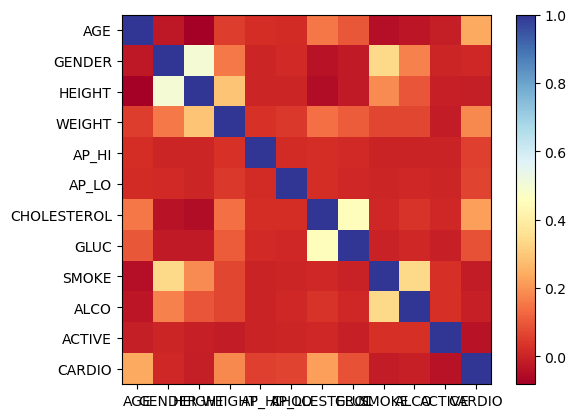

In [55]:
# Heat map for correlation using Matplotlib
import matplotlib.pyplot as plt
corr = df[['AGE','GENDER','HEIGHT','WEIGHT','AP_HI','AP_LO',
 'CHOLESTEROL','GLUC','SMOKE','ALCO','ACTIVE','CARDIO']].corr()
# Displaying dataframe as an heatmap
# with diverging colourmap as RdYlBu
plt.imshow(corr, cmap ="RdYlBu")

# Displaying a color bar to understand
# which color represents which range of data
plt.colorbar()

# Assigning labels of x-axis
# according to dataframe
plt.xticks(range(len(corr)), corr.columns)

# Assigning labels of y-axis
# according to dataframe
plt.yticks(range(len(corr)), corr.index)
# Displaying the figure
plt.show()

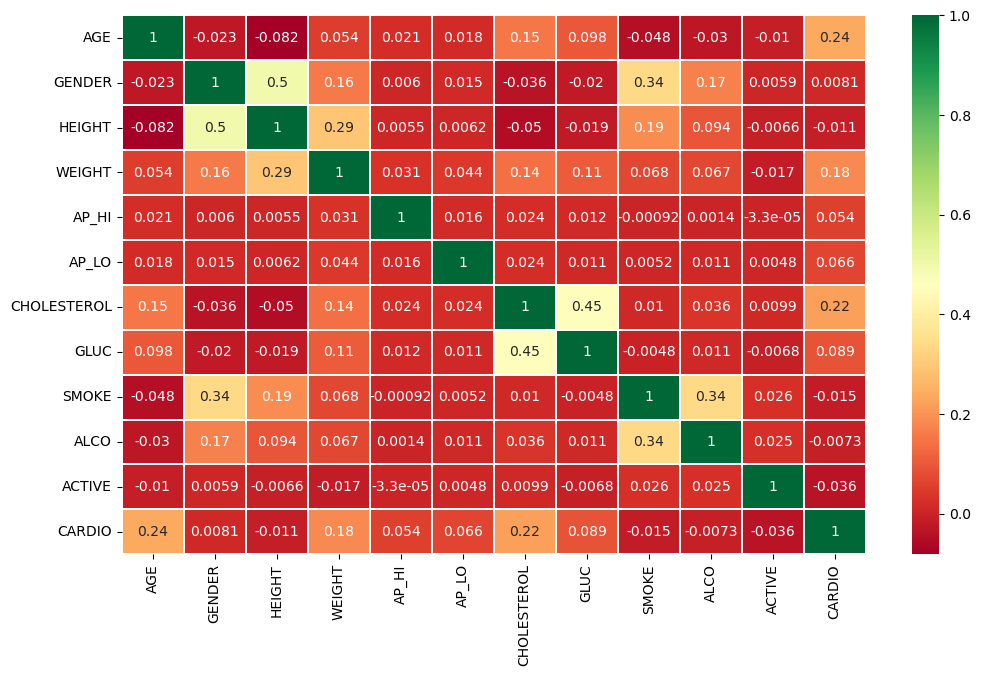

In [56]:
# Heat map for correlation using seaborn
import seaborn as sns
# Defining figure size
# for the output plot
fig, ax = plt.subplots(figsize = (12, 7))
# Displaying dataframe as an heatmap
# with diverging colourmap as RdYlGn
sns.heatmap(corr, cmap ='RdYlGn', linewidths = 0.30, annot = True)
plt.show()

Other Figures

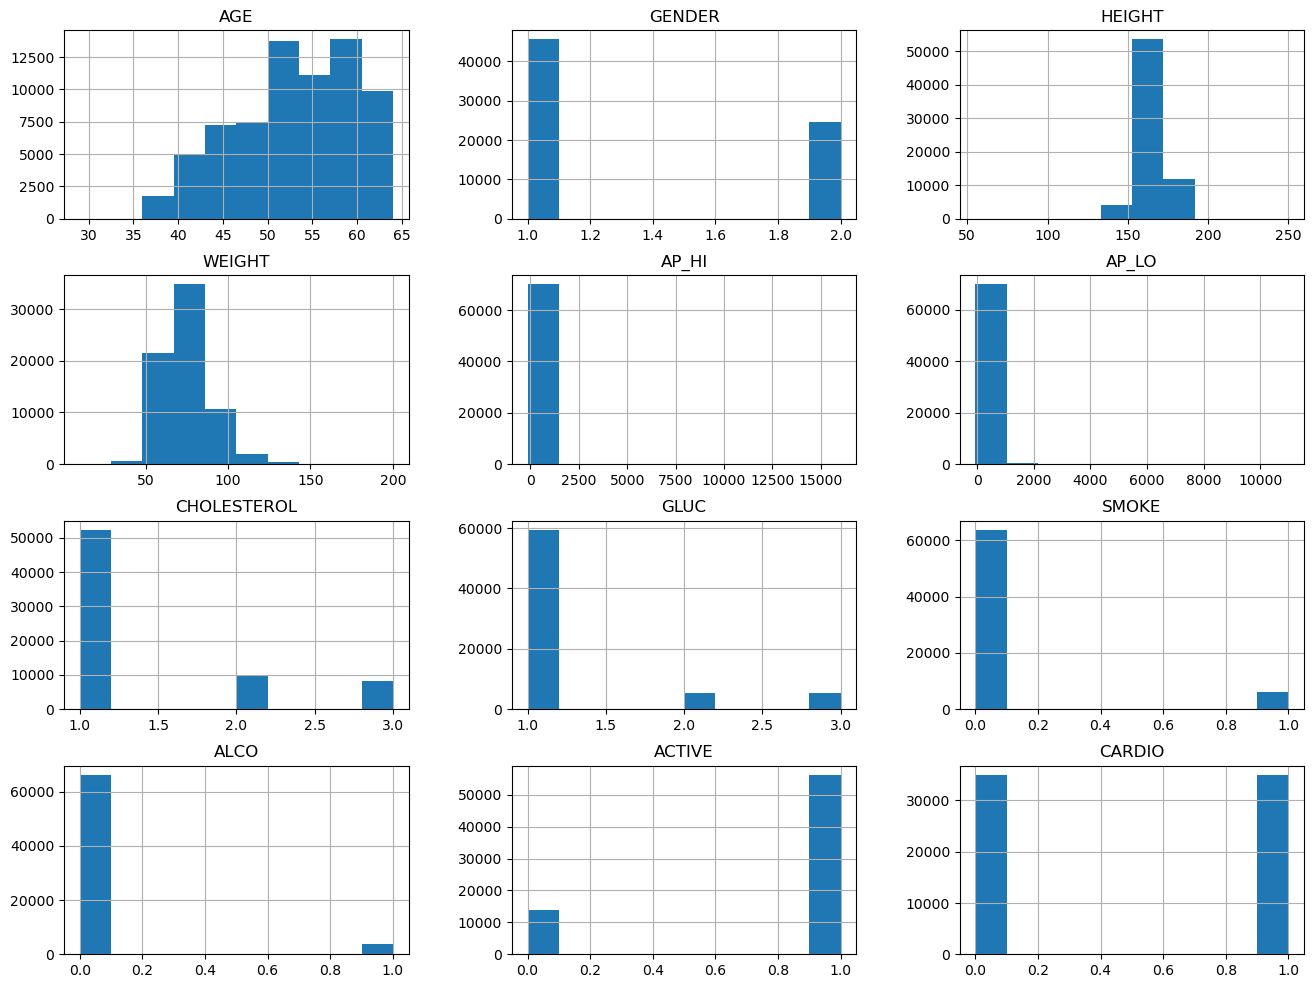

In [57]:
# Histogram of features
df[['AGE','GENDER','HEIGHT','WEIGHT','AP_HI','AP_LO',
 'CHOLESTEROL','GLUC','SMOKE','ALCO','ACTIVE','CARDIO']].hist(figsize=[16, 12])
plt.show()

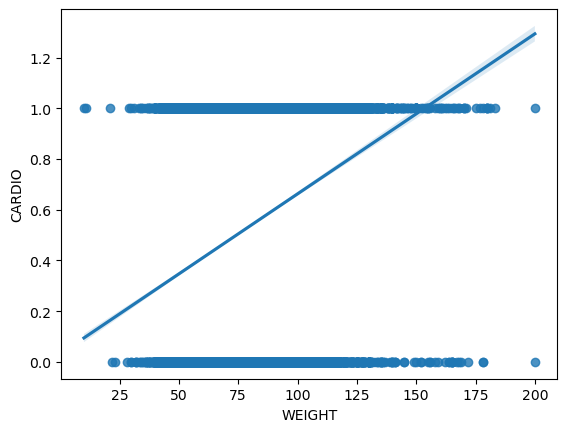

In [58]:
# draw regplot
sns.regplot(x = "WEIGHT",
            y = "CARDIO",
 data = df,
 dropna = True)
# show the plot
ax.set(xlabel='WEIGHT', ylabel='CARDIO')
plt.show()

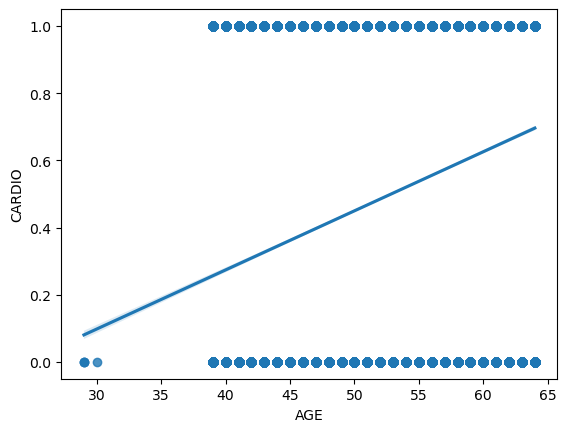

In [59]:
# draw regplot
sns.regplot(x = "AGE",
 y = "CARDIO",
 data = df,
 dropna = True)
# show the plot
ax.set(xlabel='AGE', ylabel='CARDIO')
plt.show()

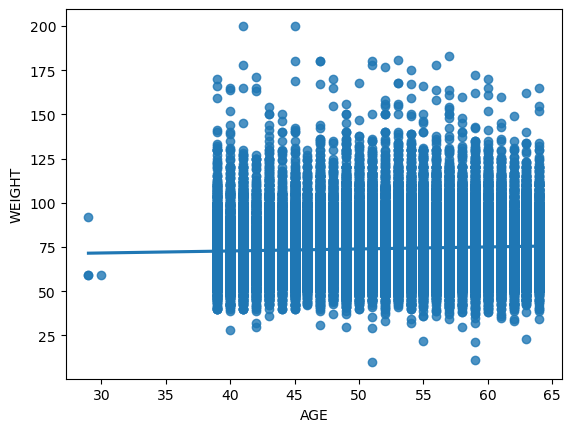

In [60]:
# draw regplot
sns.regplot(x = "AGE",
 y = "WEIGHT",
 data = df,
 dropna = True)
# show the plot
ax.set(xlabel='AGE', ylabel='WEIGHT')
plt.show()

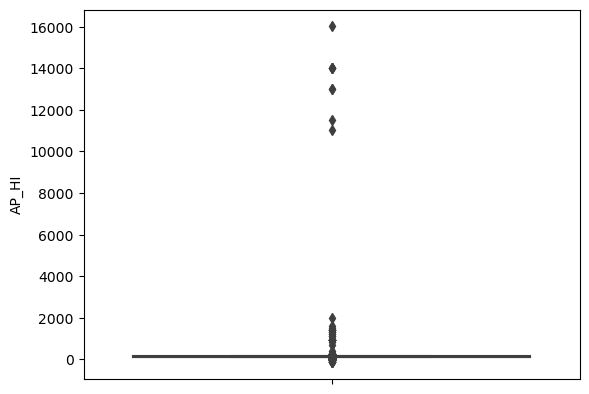

In [61]:
# Box plot for AP_H
sns.boxplot(y= "AP_HI", data = df)
plt.show()

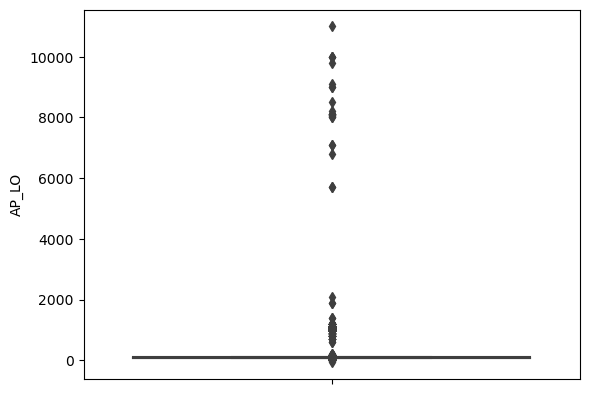

In [62]:
# Box plot for AP_LO
sns.boxplot(y= "AP_LO", data = df)
plt.show()

Clean and standardize data

In [63]:
# Process for AP_HI
first_quantile,third_quantile = df.AP_HI.quantile([0.25, 0.75])
iqr = third_quantile - first_quantile
maximum = third_quantile + 1.5*iqr
minimum = first_quantile - 1.5*iqr
print("maximum:",maximum,"minimum:",minimum)
df.loc[df.AP_HI>maximum,'AP_HI'] = maximum
df.loc[df.AP_HI<minimum,'AP_HI'] = minimum

maximum: 170.0 minimum: 90.0


In [64]:
# Process for AP_LO
first_quantile,third_quantile = df.AP_LO.quantile([0.25, 0.75])
iqr = third_quantile - first_quantile
maximum = third_quantile + 1.5*iqr
minimum = first_quantile - 1.5*iqr
print("maximum:",maximum,"minimum:",minimum)
df.loc[df.AP_LO>maximum,'AP_LO'] = maximum
df.loc[df.AP_LO<minimum,'AP_LO'] = minimum

maximum: 105.0 minimum: 65.0


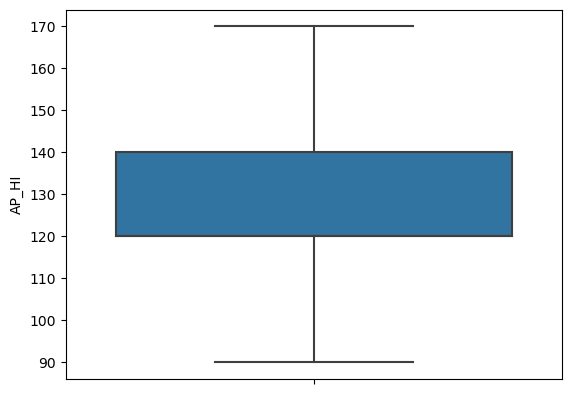

In [65]:
# Redraw Box plot for AP_H
sns.boxplot(y= "AP_HI", data = df)
plt.show()

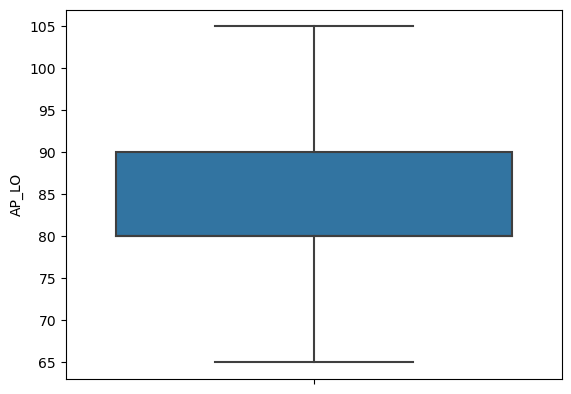

In [66]:
# Redraw Box plot for AP_H
sns.boxplot(y= "AP_LO", data = df)
plt.show()

Statistic

CHOLESTEROL vs CARDIO

In [67]:
# Importing library
from scipy.stats import f_oneway
# Conduct the one-way ANOVA
low_cholesterol=df[df['CHOLESTEROL']==1].CARDIO
high_cholesterol=df[df['CHOLESTEROL']==2].CARDIO
very_high_cholesterol = df[df['CHOLESTEROL']==3].CARDIO
f_statistic, p_value = f_oneway(low_cholesterol, high_cholesterol, very_high_cholesterol)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 1799.6607856699602, P-Value: 0.0


AGE vs CARDIO

In [68]:
from scipy.stats import levene,ttest_ind
lower_age_group = df[df.AGE<df.AGE.mean()].CARDIO
higher_age_group = df[df.AGE>=df.AGE.mean()].CARDIO
# Using levene test to check whether 2 variance is equal
f_statistic, p_value =levene(lower_age_group,
 higher_age_group, center='mean')
print("Levene Test: F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))
# If p-value is greater than 0.05 we can assume equality of variance
f_statistic, p_value = ttest_ind(lower_age_group,
 higher_age_group, equal_var = p_value>0.05)
print("T-Test: F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

Levene Test: F_Statistic: 133.98315419526062, P-Value: 5.88006908232294e-31
T-Test: F_Statistic: -52.51350890203989, P-Value: 0.0


WEIGHT vs CARDIO

In [69]:
from scipy.stats import pearsonr
coeff, p_value = pearsonr(df.WEIGHT, df.CARDIO)
print("coeff:",coeff,"p_value:",p_value)

coeff: 0.18165940834451605 p_value: 0.0


ALCOHOL vs CARDIO

In [70]:
from scipy.stats import chi2_contingency
# Create a cross tab table
cont_table = pd.crosstab(df.ALCO, df.CARDIO)
# calculate chi square values
chi2_contingency(cont_table, correction = True)

(3.696547466479263,
 0.05452518218322108,
 1,
 array([[33137.8708, 33098.1292],
        [ 1883.1292,  1880.8708]]))

OSL Model

In [71]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
## X is the input variables (or independent variables)
X = df[['AGE','GENDER','HEIGHT','WEIGHT','AP_HI','AP_LO',
 'CHOLESTEROL','GLUC','SMOKE','ALCO','ACTIVE']]
## add an intercept (beta_0) to our model
X = sm.add_constant(X)
## y is the target/dependent variable
y = df['CARDIO']
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 CARDIO   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     1954.
Date:                Sun, 29 Oct 2023   Prob (F-statistic):               0.00
Time:                        04:14:33   Log-Likelihood:                -41431.
No. Observations:               70000   AIC:                         8.289e+04
Df Residuals:                   69988   BIC:                         8.300e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.6708      0.042    -39.948      0.000      -1.753      -1.589
AGE             0.0101      0.000     40.131      0.000       0.010       0.011
GENDER         -0.0041      0.004     -0.979      0.328      -0.012       0.004
HEIGHT         -0.0008      0.000     -3.229      0.001      -0.001      -0.000
WEIGHT          0.0021      0.000     16.542      0.000       0.002       0.002
AP_HI           0.0096      0.000     64.319      0.000       0.009       0.010
AP_LO           0.0040      0.000     14.993      0.000       0.003       0.005
CHOLESTEROL     0.0941      0.003     33.686      0.000       0.089       0.100
GLUC           -0.0207      0.003     -6.381      0.000      -0.027      -0.014
SMOKE          -0.0257      0.007     -3.953      0.000      -0.039      -0.013
ALCO           -0.0379      0.008     -4.840      0.000      -0.053      -0.023
ACTIVE         -0.0437      0.004    -10.487      0.000      -0.052      -0.036
==============================================================================
Omnibus:                    26450.210   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3466.466
Skew:                           0.049   Prob(JB):                         0.00
Kurtosis:                       1.914   Cond. No.                     6.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Create model to classify the problem

Standardization data

In [72]:
df = df[['AGE','GENDER','HEIGHT','WEIGHT','AP_HI','AP_LO',
 'CHOLESTEROL','GLUC','SMOKE','ALCO','ACTIVE','CARDIO']]
# Scale AGE, HEIGHT, WEIGHT, AP_HI, AP_LO using standard scaler

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(df[['AGE', 'HEIGHT', 'WEIGHT', 'AP_HI', 'AP_LO']])

In [74]:
import numpy as np
data = np.concatenate([data, df[['GENDER', 'CHOLESTEROL', 'GLUC', 'SMOKE', 'ALCO', 'ACTIVE', 'CARDIO']]], axis=1)
X = data[:, :-1]  # First 11 columns
y = data[:, -1]   # 12th column
#data.shape (70000, 12)
#print(X.shape,y.shape) (70000, 11) (70000,)

Split data

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Build Model

In [ ]:
from sklearn.linear_model import RidgeClassifier
ridge = RidgeClassifier(alpha = 0.0001)
ridge.fit(X_train,y_train)

Evaluation Model

In [77]:
from sklearn.metrics import accuracy_score
y_hat = ridge.predict(X_test)
accuracy_score(y_test, y_hat)

0.7301428571428571

Finetunning model

RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create a Random Forest model
rf_model = RandomForestClassifier()

# Define a parameter grid to search
param_grid = {
     'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}



# Perform Grid Search with cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train a new model with the best parameters
best_rf_model = RandomForestClassifier(**best_params)
best_rf_model.fit(X_train, y_train)

# Evaluate the model
y_rf_pred = best_rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Create a GradientBoostingClassifier model
gb_model = GradientBoostingClassifier()

# Define a parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train a new model with the best parameters
best_gb_model = GradientBoostingClassifier(**best_params)
best_gb_model.fit(X_train, y_train)

# Evaluate the model
y_gb_pred = best_gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, y_gb_pred)
print("GradientBoostingClassifier Accuracy:", gb_accuracy)

AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Create and train AdaBoostClassifier model
adaboost_model = AdaBoostClassifier(n_estimators=300, learning_rate=0.1, random_state=42)
adaboost_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_adaboost_pred = adaboost_model.predict(X_test)
adaboost_accuracy = accuracy_score(y_test, y_adaboost_pred)
print("AdaBoostClassifier Accuracy:", adaboost_accuracy)

Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest classifier as the base estimator
base_estimator = RandomForestClassifier(n_estimators=100, random_state=42)

# Create and train BaggingClassifier model with the Random Forest base estimator
bagging_model = BaggingClassifier(base_estimator=base_estimator, n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_bagging_pred = bagging_model.predict(X_test)
bagging_accuracy = accuracy_score(y_test, y_bagging_pred)
print(" Bagging Classifier Accuracy:", bagging_accuracy)

Extra TreeClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

# Create and train ExtraTreesClassifier model
extra_tree_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
extra_tree_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_extra_tree_pred = extra_tree_model.predict(X_test)
extra_tree_accuracy = accuracy_score(y_test, y_extra_tree_pred)
print("Extra TreeClassifier Accuracy:", extra_tree_accuracy)

Stack Classifier

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Define base models
base_models = [
    ('random_forest', RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)),
    ('gradient_boosting', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
]

# Define the final estimator (you can choose a different estimator)
final_estimator = LogisticRegression()

# Create StackingClassifier with base models and final estimator
stacking_model = StackingClassifier(estimators=base_models, final_estimator=final_estimator)

# Train the StackingClassifier
stacking_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_stacking_pred = stacking_model.predict(X_test)
stacking_accuracy = accuracy_score(y_test, y_stacking_pred)
print("Stacking Classifier Accuracy:", stacking_accuracy)

Support Vector Machine (SVM):

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', C=1, random_state=0)
svm_model.fit(X_train, y_train)
y_svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_svm_pred)
print("SVM Accuracy:", svm_accuracy)

Logistic Regression:

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_logistic_pred = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, y_logistic_pred)
print("Logistic Regression Accuracy:", logistic_accuracy)

Naive Bayes Classifier:

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_nb_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, y_nb_pred)
print("Naive Bayes Accuracy:", nb_accuracy)